In [1]:
# importing libraries
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [2]:
df = pd.read_csv(r'/Users/saro/Desktop/redbus_selenium/csv_files/df.csv')
df

,Route_name,Route_link
0,Vijayawada to Hyderabad,https://www.redbus.in/bus-tickets/vijayawada-t...
1,Hyderabad to Vijayawada,https://www.redbus.in/bus-tickets/hyderabad-to...
2,Kakinada to Visakhapatnam,https://www.redbus.in/bus-tickets/kakinada-to-...
3,Visakhapatnam to Kakinada,https://www.redbus.in/bus-tickets/visakhapatna...
4,Chittoor (Andhra Pradesh) to Bangalore,https://www.redbus.in/bus-tickets/chittoor-and...
...,...,...
347,Habra to Durgapur (West Bengal),https://www.redbus.in/bus-tickets/habra-to-dur...
348,Barasat (West Bengal) to Mechogram,https://www.redbus.in/bus-tickets/barasat-west...
349,Habra to Haldia,https://www.redbus.in/bus-tickets/habra-to-haldia
350,Habra to Contai (Kanthi),https://www.redbus.in/bus-tickets/habra-to-con...


In [3]:
driver = webdriver.Chrome()
driver.maximize_window()
Bus_names = []
Bus_types= []
Start_Time = []
End_Time = []
Ratings = []
Total_Duration = []
Prices = []
Seats_Available = []
Route_names = []
Route_links = []

def right_button():
    try:
        right_button = driver.find_elements(By.XPATH, "//i[@class = 'icon icon-right']")
        right_button[0].click()
        time.sleep(6)
    except:
        pass

for i,r in df.iterrows():
    link=r["Route_link"]
    routes=r["Route_name"]

    # Loop through each link
    driver.get(link)
    time.sleep(3)  

    # Click on elements to reveal bus details
    elements = driver.find_elements(By.XPATH, f"//a[contains(@href, '{link}')]")
    for element in elements:
        element.click()

    right_button()
    # click elements to views bus
    try:
        clicks = driver.find_elements(By.XPATH, "//div[@class='button']")
        for x in clicks:
            x.click()
            time.sleep(1)
    except:
        continue  
    time.sleep(2)
    
    # Initialize scrolling
    SCROLL_PAUSE_TIME = 1

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    
    # Extract bus details
    bus_name = driver.find_elements(By.XPATH, "//div[@class='travels lh-24 f-bold d-color']")
    bus_type = driver.find_elements(By.XPATH, "//div[@class='bus-type f-12 m-top-16 l-color evBus']")
    start_time = driver.find_elements(By.XPATH, "//*[@class='dp-time f-19 d-color f-bold']")
    end_time = driver.find_elements(By.XPATH, "//*[@class='bp-time f-19 d-color disp-Inline']")
    total_duration = driver.find_elements(By.XPATH, "//*[@class='dur l-color lh-24']")
    try:
        rating = driver.find_elements(By.XPATH,"//div[@class='clearfix row-one']/div[@class='column-six p-right-10 w-10 fl']")
    except:
        continue
    price = driver.find_elements(By.XPATH, '//*[@class="fare d-block"]')
    seats = driver.find_elements(By.XPATH, "//div[contains(@class, 'seat-left')]")

    # Append data to respective lists
    for bus in bus_name:
        Bus_names.append(bus.text)
        Route_links.append(link)
        Route_names.append(routes)
    for bus_type_elem in bus_type:
        Bus_types.append(bus_type_elem.text)
    for start_time_elem in start_time:
        Start_Time.append(start_time_elem.text)
    for end_time_elem in end_time:
        End_Time.append(end_time_elem.text)
    for total_duration_elem in total_duration:
        Total_Duration.append(total_duration_elem.text)
    for ratings in rating:
        Ratings.append(ratings.text)
    for price_elem in price:
        Prices.append(price_elem.text)
    for seats_elem in seats:
        Seats_Available.append(seats_elem.text)
        
print("Successfully Completed")

KeyboardInterrupt: 

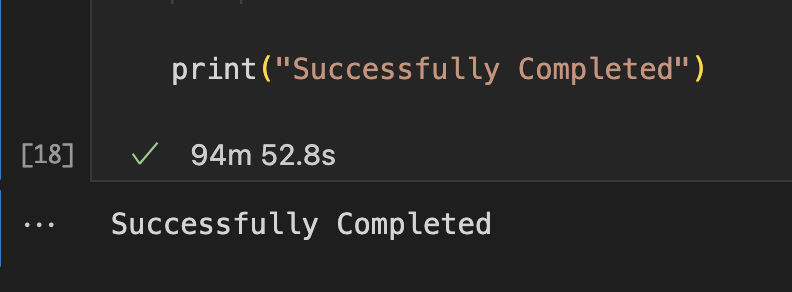

In [4]:
driver.quit()

In [10]:
data = {
    'Bus_name': Bus_names,
    'Bus_type': Bus_types,
    'Start_time': Start_Time,
    'End_time': End_Time,
    'Total_duration': Total_Duration,
    'Price': Prices,
    "Seats_Available":Seats_Available,
    "Ratings":Ratings,
    'Route_link': Route_links,
    'Route_name': Route_names
}

In [11]:
df = pd.DataFrame(data)
df

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,INR 567,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,INR 528,14 Seats available,1.5\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,INR 639,34 Seats available,2.5\n6,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,INR 567,32 Seats available,2.9\n7,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,INR 567,32 Seats available,1.1\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
...,...,...,...,...,...,...,...,...,...,...
9645,SBSTC-BONGAON - DIGHA - VIA - BARASAT - 05:15 ...,Non AC Seater (2+3),06:30,00:00,17h 30m,INR 159,48 Seats available,4.4,https://www.redbus.in/bus-tickets/habra-to-con...,Habra to Contai (Kanthi)
9646,Santosh Bus Service,A/C Seater Push Back (2+3),05:10,09:30,04h 20m,416,6 Seats available,4.6\n6,https://www.redbus.in/bus-tickets/habra-to-con...,Habra to Contai (Kanthi)
9647,WBTC (CTC) Habra-Midnapur - 194|05:25,Non AC Seater (2+3),05:25,09:35,04h 10m,INR 138,48 Seats available,4.1,https://www.redbus.in/bus-tickets/habra-to-mid...,Habra to Midnapore
9648,WBTC (CTC) Habra-Midnapur - 194|05:55,Non AC Seater (2+3),05:55,10:15,04h 20m,INR 138,43 Seats available,4.1\n21,https://www.redbus.in/bus-tickets/habra-to-mid...,Habra to Midnapore


In [12]:
df.to_csv(r"/Users/saro/Desktop/redbus_selenium/csv_files/all_bus_details.csv",index = False)

# Exploratory Data Analysis and Data Cleansing

In [7]:
import numpy as np

In [42]:
df = pd.read_csv(r'/Users/saro/Desktop/redbus_selenium/csv_files/all_bus_details.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Bus_name         9104 non-null   object
 1   Bus_type         9096 non-null   object
 2   Start_time       9104 non-null   object
 3   End_time         9104 non-null   object
 4   Total_duration   9104 non-null   object
 5   Price            9103 non-null   object
 6   Seats_Available  9099 non-null   object
 7   Ratings          9103 non-null   object
 8   Route_link       9650 non-null   object
 9   Route_name       9650 non-null   object
dtypes: object(10)
memory usage: 754.0+ KB


In [15]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,INR 567,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,INR 528,14 Seats available,1.5\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,INR 639,34 Seats available,2.5\n6,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,INR 567,32 Seats available,2.9\n7,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,INR 567,32 Seats available,1.1\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad


In [44]:
#Price have INR and it is a non numerical
df['Price'][0] #printing one element of rating

'INR 567'

In [45]:
df["Price"]=df["Price"].str.replace("INR ","") #Removing the INR 
#INR 469

In [46]:
df["Price"]=df["Price"].astype(float) #converting string to float
df["Price"].fillna(0) #if null values it will will with zero Treating null values

0       567.0
1       528.0
2       639.0
3       567.0
4       567.0
        ...  
9645    159.0
9646    416.0
9647    138.0
9648    138.0
9649    143.0
Name: Price, Length: 9650, dtype: float64

In [47]:
df['Ratings']

0           4.0
1        1.5\n4
2        2.5\n6
3        2.9\n7
4        1.1\n4
         ...   
9645        4.4
9646     4.6\n6
9647        4.1
9648    4.1\n21
9649    4.6\n17
Name: Ratings, Length: 9650, dtype: object

In [48]:
df ['Ratings'] = df['Ratings'].str.replace("New","")

In [ ]:
# use excel filter to analyse the csv extracted file. Some of the ratings have formate of 5.1 30 
#format float int

In [49]:
df['Ratings'] = df['Ratings'].str.strip()

In [50]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,567.0,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,528.0,14 Seats available,1.5\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,639.0,34 Seats available,2.5\n6,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,567.0,32 Seats available,2.9\n7,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,567.0,32 Seats available,1.1\n4,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad


In [43]:
df.to_csv("checking.csv")

In [51]:
df["Ratings"]=df["Ratings"].str.split().str[0]

In [52]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,567.0,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,528.0,14 Seats available,1.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,639.0,34 Seats available,2.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,567.0,32 Seats available,2.9,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,567.0,32 Seats available,1.1,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad


In [53]:
df["Ratings"] = pd.to_numeric(df["Ratings"], errors='coerce') #try to convert to numeric and if fails fill with NaN (not a number)

In [54]:
df["Ratings"].fillna(0,inplace=True) 

/var/folders/s3/w_ry2nkj7yg8gd7c39mx7xy00000gn/T/ipykernel_3053/533842216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ratings"].fillna(0,inplace=True)


In [55]:
df.head()

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,567.0,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,528.0,14 Seats available,1.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,639.0,34 Seats available,2.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,567.0,32 Seats available,2.9,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,567.0,32 Seats available,1.1,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         9104 non-null   object 
 1   Bus_type         9096 non-null   object 
 2   Start_time       9104 non-null   object 
 3   End_time         9104 non-null   object 
 4   Total_duration   9104 non-null   object 
 5   Price            9103 non-null   float64
 6   Seats_Available  9099 non-null   object 
 7   Ratings          9650 non-null   float64
 8   Route_link       9650 non-null   object 
 9   Route_name       9650 non-null   object 
dtypes: float64(2), object(8)
memory usage: 754.0+ KB


In [57]:
df = df.replace({np.nan: None})

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         9104 non-null   object 
 1   Bus_type         9096 non-null   object 
 2   Start_time       9104 non-null   object 
 3   End_time         9104 non-null   object 
 4   Total_duration   9104 non-null   object 
 5   Price            9103 non-null   object 
 6   Seats_Available  9099 non-null   object 
 7   Ratings          9650 non-null   float64
 8   Route_link       9650 non-null   object 
 9   Route_name       9650 non-null   object 
dtypes: float64(1), object(9)
memory usage: 754.0+ KB


In [59]:
df.isnull().sum()

Bus_name           546
Bus_type           554
Start_time         546
End_time           546
Total_duration     546
Price              547
Seats_Available    551
Ratings              0
Route_link           0
Route_name           0
dtype: int64

In [60]:
df = df.dropna(subset=['Bus_name'])

In [61]:
df.isnull().sum()

Bus_name           0
Bus_type           8
Start_time         0
End_time           0
Total_duration     0
Price              1
Seats_Available    5
Ratings            0
Route_link         0
Route_name         0
dtype: int64

In [35]:
df = df.dropna(subset=['Bus_type'])

In [64]:
df = df.dropna(subset=['Price'])

In [38]:
df = df.dropna(subset=['Seats_Available'])

In [65]:
df.isnull().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_link         0
Route_name         0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9096 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         9096 non-null   object 
 1   Bus_type         9096 non-null   object 
 2   Start_time       9096 non-null   object 
 3   End_time         9096 non-null   object 
 4   Total_duration   9096 non-null   object 
 5   Price            9096 non-null   object 
 6   Seats_Available  9096 non-null   object 
 7   Ratings          9096 non-null   float64
 8   Route_link       9096 non-null   object 
 9   Route_name       9096 non-null   object 
dtypes: float64(1), object(9)
memory usage: 781.7+ KB


In [ ]:
df.to_csv("/Users/saro/Desktop/redbus_selenium/checks.csv")

In [62]:
df = df.fillna({'Bus_type':"unknown",'Seats_Available':0})

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         9103 non-null   object 
 1   Bus_type         9103 non-null   object 
 2   Start_time       9103 non-null   object 
 3   End_time         9103 non-null   object 
 4   Total_duration   9103 non-null   object 
 5   Price            9103 non-null   object 
 6   Seats_Available  9103 non-null   object 
 7   Ratings          9103 non-null   float64
 8   Route_link       9103 non-null   object 
 9   Route_name       9103 non-null   object 
dtypes: float64(1), object(9)
memory usage: 782.3+ KB


In [67]:
df.isnull().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_link         0
Route_name         0
dtype: int64

In [38]:
df = df.dropna(subset=['Price'])

In [39]:
df.isnull().sum()

Bus_name           0
Bus_type           0
Start_time         0
End_time           0
Total_duration     0
Price              0
Seats_Available    0
Ratings            0
Route_link         0
Route_name         0
dtype: int64

# MySQL Data storing

In [5]:
import mysql

In [6]:
import mysql.connector

In [12]:
#sql connection
conn=mysql.connector.connect(host="localhost", user="root", password="Saro@123",database="redbus")
my_cursor = conn.cursor()

In [29]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS bus_routess(
                  ID INT AUTO_INCREMENT PRIMARY KEY,
                  Bus_name VARCHAR(255) NOT NULL,
                  Bus_type VARCHAR(255) NOT NULL,
                  Start_time VARCHAR(255) NOT NULL,
                  End_time VARCHAR(255) NOT NULL,
                  Total_duration VARCHAR(255) NOT NULL,
                  Price FLOAT NULL,
                  Seats_Available VARCHAR(255) NOT NULL,
                  Ratings Float NULL,
                  Route_link VARCHAR(255) NULL,
                  Route_name VARCHAR(255) NULL,
                  Origin VARCHAR(255) NULL,
                  Destination VARCHAR(255) NULL
                  )''')
print("Table Created successfully")

Table Created successfully


In [30]:
insert_query = '''INSERT INTO bus_routess(
                    Bus_name,
                    Bus_type,
                    Start_time,
                    End_time,
                    Total_duration,
                    Price,
                    Seats_Available,
                    Ratings,
                    Route_link,
                    Route_name,
                    Origin,
                    Destination)
                  VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
data = df1.values.tolist()

my_cursor.executemany(insert_query, data)

conn.commit()

print("Values inserted successfully")


Values inserted successfully


In [74]:
df.to_csv(r"/Users/saro/Desktop/redbus_selenium/csv_files/accurate.csv")

In [31]:
df1 = pd.read_csv('csv_files/accurate.csv')

In [25]:
df1.info()
df1.to_csv("final_backup.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9103 entries, 0 to 9102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bus_name         9103 non-null   object 
 1   Bus_type         9103 non-null   object 
 2   Start_time       9103 non-null   object 
 3   End_time         9103 non-null   object 
 4   Total_duration   9103 non-null   object 
 5   Price            9103 non-null   float64
 6   Seats_Available  9103 non-null   object 
 7   Ratings          9103 non-null   float64
 8   Route_link       9103 non-null   object 
 9   Route_name       9103 non-null   object 
dtypes: float64(2), object(8)
memory usage: 711.3+ KB


In [19]:
df1 = df1.drop(df1.columns[0],axis =1)

In [27]:
df1[['Origin','Destination']] = df1['Route_name'].str.split(" to ", expand=True)

In [28]:
df1

,Bus_name,Bus_type,Start_time,End_time,Total_duration,Price,Seats_Available,Ratings,Route_link,Route_name,Origin,Destination
0,APSRTC - 37800,INDRA(A.C. Seater),00:15,05:45,05h 30m,567.0,34 Seats available,4.0,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad,Vijayawada,Hyderabad
1,APSRTC - 24255,INDRA(A.C. Seater),00:20,04:40,04h 20m,528.0,14 Seats available,1.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad,Vijayawada,Hyderabad
2,APSRTC - 2677,NIGHT RIDER (SEATER CUM SLEEPER),00:40,06:15,05h 35m,639.0,34 Seats available,2.5,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad,Vijayawada,Hyderabad
3,APSRTC - 2777,INDRA(A.C. Seater),00:45,06:55,06h 10m,567.0,32 Seats available,2.9,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad,Vijayawada,Hyderabad
4,APSRTC - 4919,INDRA(A.C. Seater),00:45,05:50,05h 05m,567.0,32 Seats available,1.1,https://www.redbus.in/bus-tickets/vijayawada-t...,Vijayawada to Hyderabad,Vijayawada,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
9098,SBSTC-BONGAON - DIGHA - VIA - BARASAT - 05:15 ...,Non AC Seater (2+3),06:30,00:00,17h 30m,159.0,48 Seats available,4.4,https://www.redbus.in/bus-tickets/habra-to-con...,Habra to Contai (Kanthi),Habra,Contai (Kanthi)
9099,Santosh Bus Service,A/C Seater Push Back (2+3),05:10,09:30,04h 20m,416.0,6 Seats available,4.6,https://www.redbus.in/bus-tickets/habra-to-con...,Habra to Contai (Kanthi),Habra,Contai (Kanthi)
9100,WBTC (CTC) Habra-Midnapur - 194|05:25,Non AC Seater (2+3),05:25,09:35,04h 10m,138.0,48 Seats available,4.1,https://www.redbus.in/bus-tickets/habra-to-mid...,Habra to Midnapore,Habra,Midnapore
9101,WBTC (CTC) Habra-Midnapur - 194|05:55,Non AC Seater (2+3),05:55,10:15,04h 20m,138.0,43 Seats available,4.1,https://www.redbus.in/bus-tickets/habra-to-mid...,Habra to Midnapore,Habra,Midnapore
